In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../csv_/movies.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
df.apply(lambda x: x.str.strip(), axis=1)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,NaN,"June 13, 1980 (United States)",NaN,NaN,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,NaN,NaN,Warner Bros.,NaN
1,The Blue Lagoon,R,Adventure,NaN,"July 2, 1980 (United States)",NaN,NaN,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,NaN,NaN,Columbia Pictures,NaN
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,NaN,"June 20, 1980 (United States)",NaN,NaN,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,NaN,NaN,Lucasfilm,NaN
3,Airplane!,PG,Comedy,NaN,"July 2, 1980 (United States)",NaN,NaN,Jim Abrahams,Jim Abrahams,Robert Hays,United States,NaN,NaN,Paramount Pictures,NaN
4,Caddyshack,R,Comedy,NaN,"July 25, 1980 (United States)",NaN,NaN,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,NaN,NaN,Orion Pictures,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,NaN,"October 23, 2020 (United States)",NaN,NaN,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,NaN,NaN,NaN,NaN
7664,Dream Round,NaN,Comedy,NaN,"February 7, 2020 (United States)",NaN,NaN,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,NaN
7665,Saving Mbango,NaN,Drama,NaN,"April 27, 2020 (Cameroon)",NaN,NaN,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,NaN,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,NaN,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,NaN,NaN,NaN,NaN


In [9]:
df2 = df[['genre','name']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genre   7668 non-null   object
 1   name    7668 non-null   object
dtypes: object(2)
memory usage: 119.9+ KB


In [10]:
word_cnt = {}
def split_word(x):
    words = x.split()
    words_lower = []
    for word in words:
        words_lower.append(word.lower())
    
    for i in words_lower:
        word_cnt[i] = words_lower.count(i)

In [11]:
df2.head()

,genre,name
0,Drama,The Shining
1,Adventure,The Blue Lagoon
2,Action,Star Wars: Episode V - The Empire Strikes Back
3,Comedy,Airplane!
4,Comedy,Caddyshack


In [12]:
genre_group = df2.groupby('genre')

In [13]:
genre_group.count()

,name
genre,
Action,1705
Adventure,427
Animation,338
Biography,443
Comedy,2245
Crime,551
Drama,1518
Family,11
Fantasy,44


In [14]:
action = df2['genre']=='Action'
df_action = df2[action]
df_action

,genre,name
2,Action,Star Wars: Episode V - The Empire Strikes Back
6,Action,The Blues Brothers
8,Action,Superman II
10,Action,Any Which Way You Can
22,Action,The Final Countdown
...,...,...
7645,Action,Birds of Prey
7648,Action,Bad Boys for Life
7649,Action,Sonic the Hedgehog
7652,Action,The Eight Hundred


In [15]:
df3 = df2.set_index('genre')
df3.sort_index()

,name
genre,
Action,Jurassic World: Fallen Kingdom
Action,Eight Legged Freaks
Action,The Prophecy
Action,Star Trek: Nemesis
Action,The Predator
...,...
Thriller,Cross Country
Thriller,Defense of the Realm
Western,Barbarosa


In [16]:
action_word = {}
comedy_word = {}
horror_word = {}

def split_word(x):
    if x.index == 'Action':
        words = x.split()
        words_lower = []
        for word in words:
            words_lower.append(word.lower())
        
        for i in words_lower:
            action_word[i] = words_lower.count(i)

In [17]:

def split_word(x):
    if x['genre'] == 'Action':
        words = list((x['name'].split()))
        words_lower = []
        for word in words:
            words_lower.append(word.lower())
        
        for i in words_lower:
            action_word[i] = words_lower.count(i)
def split_word1(x):
    if x['genre'] == 'Comedy':
        words = list((x['name'].split()))
        words_lower = []
        for word in words:
            words_lower.append(word.lower())
        
        for i in words_lower:
            comedy_word[i] = words_lower.count(i)
def split_word2(x):
    if x['genre'] == 'Horror':
        words = list((x['name'].split()))
        words_lower = []
        for word in words:
            words_lower.append(word.lower())
        
        for i in words_lower:
            horror_word[i] = words_lower.count(i)

In [18]:
df2.apply(split_word, axis=1)
df2.apply(split_word1, axis=1)
df2.apply(split_word2, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
7663    None
7664    None
7665    None
7666    None
7667    None
Length: 7668, dtype: object

In [19]:
sorted(action_word.items(), key=lambda x:x[1], reverse=True)

[('&', 2),
 ('best', 2),
 ('wild', 2),
 ('saints', 2),
 ('om', 2),
 ('like', 2),
 ('star', 1),
 ('wars:', 1),
 ('episode', 1),
 ('v', 1),
 ('-', 1),
 ('the', 1),
 ('empire', 1),
 ('strikes', 1),
 ('back', 1),
 ('blues', 1),
 ('brothers', 1),
 ('superman', 1),
 ('ii', 1),
 ('any', 1),
 ('which', 1),
 ('way', 1),
 ('you', 1),
 ('can', 1),
 ('final', 1),
 ('countdown', 1),
 ('raise', 1),
 ('titanic', 1),
 ('smokey', 1),
 ('and', 1),
 ('bandit', 1),
 ('stunt', 1),
 ('man', 1),
 ('island', 1),
 ('nude', 1),
 ('bomb', 1),
 ('bronco', 1),
 ('billy', 1),
 ('when', 1),
 ('time', 1),
 ('ran', 1),
 ('out...', 1),
 ('octagon', 1),
 ('mantis', 1),
 ('fist', 1),
 ('fighter', 1),
 ('indiana', 1),
 ('jones', 1),
 ('raiders', 1),
 ('of', 1),
 ('lost', 1),
 ('ark', 1),
 ('escape', 1),
 ('from', 1),
 ('new', 1),
 ('york', 1),
 ('clash', 1),
 ('titans', 1),
 ('mad', 1),
 ('max', 1),
 ('2', 1),
 ('cannonball', 1),
 ('run', 1),
 ('thief', 1),
 ('for', 1),
 ('your', 1),
 ('eyes', 1),
 ('only', 1),
 ('dragons

In [20]:
sorted(comedy_word.items(), key=lambda x:x[1], reverse=True)

[('de', 3),
 ('those', 2),
 ('la', 2),
 ('buddy', 2),
 ('author!', 2),
 ('never', 2),
 ('nerds', 2),
 ('ho', 2),
 ('east', 2),
 ('tie', 2),
 ('liar', 2),
 ('jungle', 2),
 ('kuch', 2),
 ('win', 2),
 ('melinda', 2),
 ('bang', 2),
 ('airplane!', 1),
 ('caddyshack', 1),
 ('9', 1),
 ('to', 1),
 ('5', 1),
 ('stir', 1),
 ('crazy', 1),
 ('little', 1),
 ('darlings', 1),
 ('my', 1),
 ('bodyguard', 1),
 ('seems', 1),
 ('like', 1),
 ('old', 1),
 ('times', 1),
 ('private', 1),
 ('benjamin', 1),
 ('the', 1),
 ('hollywood', 1),
 ('knights', 1),
 ('motel', 1),
 ('hell', 1),
 ('cheech', 1),
 ('and', 1),
 ("chong's", 1),
 ('next', 1),
 ('movie', 1),
 ('stardust', 1),
 ('memories', 1),
 ('melvin', 1),
 ('howard', 1),
 ('city', 1),
 ('of', 1),
 ('women', 1),
 ('eyes', 1),
 ('oh', 1),
 ('heavenly', 1),
 ('dog', 1),
 ("it's", 1),
 ('turn', 1),
 ('fatso', 1),
 ('moscow', 1),
 ('does', 1),
 ('not', 1),
 ('believe', 1),
 ('in', 1),
 ('tears', 1),
 ('fiendish', 1),
 ('plot', 1),
 ('dr.', 1),
 ('fu', 1),
 ('manc

In [21]:
sorted(horror_word.items(), key=lambda x:x[1], reverse=True)

[('friday', 1),
 ('the', 1),
 ('13th', 1),
 ('fog', 1),
 ('altered', 1),
 ('states', 1),
 ('prom', 1),
 ('night', 1),
 ('awakening', 1),
 ('boogey', 1),
 ('man', 1),
 ('evil', 1),
 ('dead', 1),
 ('part', 1),
 ('2', 1),
 ('scanners', 1),
 ('halloween', 1),
 ('ii', 1),
 ('&', 1),
 ('buried', 1),
 ('howling', 1),
 ('final', 1),
 ('conflict', 1),
 ('deadly', 1),
 ('blessing', 1),
 ('beyond', 1),
 ('my', 1),
 ('bloody', 1),
 ('valentine', 1),
 ('funhouse', 1),
 ('wolfen', 1),
 ('venom', 1),
 ('eyes', 1),
 ('of', 1),
 ('a', 1),
 ('stranger', 1),
 ('graduation', 1),
 ('day', 1),
 ('school', 1),
 ('scream', 1),
 ('thing', 1),
 ('poltergeist', 1),
 ('iii', 1),
 ('iii:', 1),
 ('season', 1),
 ('witch', 1),
 ('pieces', 1),
 ('house', 1),
 ('on', 1),
 ('sorority', 1),
 ('row', 1),
 ('amityville', 1),
 ('ii:', 1),
 ('possession', 1),
 ('time', 1),
 ('walker', 1),
 ('parasite', 1),
 ('beast', 1),
 ('within', 1),
 ('visiting', 1),
 ('hours', 1),
 ('christine', 1),
 ('sleepaway', 1),
 ('camp', 1),
 ('v

In [22]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [23]:
a = dict(df['company'].value_counts())
a

{'Universal Pictures': 377,
 'Warner Bros.': 334,
 'Columbia Pictures': 332,
 'Paramount Pictures': 320,
 'Twentieth Century Fox': 240,
 'New Line Cinema': 174,
 'Touchstone Pictures': 132,
 'Metro-Goldwyn-Mayer (MGM)': 125,
 'Walt Disney Pictures': 123,
 'TriStar Pictures': 94,
 'Dreamworks Pictures': 76,
 'Miramax': 74,
 'Fox 2000 Pictures': 63,
 'Orion Pictures': 60,
 'Summit Entertainment': 60,
 'Castle Rock Entertainment': 59,
 'Lionsgate': 58,
 'Fox Searchlight Pictures': 57,
 'Dimension Films': 56,
 'Screen Gems': 56,
 'Hollywood Pictures': 49,
 'Focus Features': 45,
 'United Artists': 41,
 'New Regency Productions': 40,
 'Morgan Creek Entertainment': 36,
 'Revolution Studios': 32,
 'BBC Films': 32,
 'The Weinstein Company': 30,
 'DreamWorks Animation': 28,
 'Alcon Entertainment': 26,
 'Carolco Pictures': 25,
 'EuropaCorp': 24,
 'New World Pictures': 20,
 'Dino De Laurentiis Company': 20,
 'Imagine Entertainment': 19,
 'CBS Films': 19,
 'Golan-Globus Productions': 19,
 'Channel 

In [24]:
df['director'].value_counts()

Woody Allen         38
Clint Eastwood      31
Directors           28
Steven Spielberg    27
Ron Howard          24
                    ..
Marcelo Epstein      1
Thomas Rickman       1
Paolo Taviani        1
Lawrence Dane        1
Pereko Mosia         1
Name: director, Length: 2949, dtype: int64

In [25]:
df['writer'].value_counts()

Woody Allen            37
Stephen King           31
Luc Besson             26
John Hughes            25
William Shakespeare    15
                       ..
Daniel G. Sullivan      1
Bonnie Turner           1
Dick King-Smith         1
Helen Prejean           1
Pereko Mosia            1
Name: writer, Length: 4535, dtype: int64

In [26]:

b = dict(df['star'].value_counts())
b

{'Nicolas Cage': 43,
 'Robert De Niro': 41,
 'Tom Hanks': 41,
 'Denzel Washington': 37,
 'Bruce Willis': 34,
 'Tom Cruise': 34,
 'Johnny Depp': 33,
 'Sylvester Stallone': 32,
 'John Travolta': 31,
 'Mel Gibson': 29,
 'Steve Martin': 29,
 'Kevin Costner': 29,
 'Adam Sandler': 28,
 'Ben Stiller': 27,
 'Jeff Bridges': 27,
 'Keanu Reeves': 27,
 'Robin Williams': 27,
 'Arnold Schwarzenegger': 27,
 'Eddie Murphy': 27,
 'Harrison Ford': 26,
 'Matt Damon': 25,
 'Matthew McConaughey': 25,
 'Mark Wahlberg': 25,
 'Meryl Streep': 25,
 'John Cusack': 24,
 'Richard Gere': 24,
 'Brad Pitt': 24,
 'Will Smith': 23,
 'Jackie Chan': 23,
 'Liam Neeson': 23,
 'Clint Eastwood': 23,
 'Ethan Hawke': 22,
 'Jim Carrey': 22,
 'Sandra Bullock': 22,
 'Dennis Quaid': 22,
 'Ben Affleck': 22,
 'Dwayne Johnson': 22,
 'Will Ferrell': 21,
 'Robert Downey Jr.': 21,
 'Christian Bale': 21,
 'Anthony Hopkins': 21,
 'Al Pacino': 21,
 'Michael Caine': 20,
 'George Clooney': 20,
 'Michael Douglas': 20,
 'Ewan McGregor': 20,
 '

In [27]:
df['country'].value_counts()

United States                     5475
United Kingdom                     816
France                             279
Canada                             190
Germany                            117
Australia                           92
Japan                               81
India                               62
Italy                               61
Spain                               47
Hong Kong                           45
Ireland                             43
China                               40
South Korea                         35
Denmark                             32
Sweden                              25
New Zealand                         25
Mexico                              22
Norway                              12
West Germany                        12
Netherlands                         12
Iran                                10
Switzerland                         10
Russia                               8
Belgium                              8
Argentina                

In [28]:
df['genre'].value_counts()

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: genre, dtype: int64

In [29]:
df_drop = df.drop(columns=['name','rating','year','released','votes','runtime'])

In [30]:
df_drop['hit rate'] = df_drop['gross'] / df_drop['budget']

In [31]:
df_drop.drop(columns=['genre','score','director'])

,writer,star,country,budget,gross,company,hit rate
0,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,2.473620
1,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,13.078468
2,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,29.909726
3,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,23.843868
4,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,6.641057
...,...,...,...,...,...,...,...
7663,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,NaN
7664,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,NaN
7665,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,James Randall,Christina Roz,United States,15000.0,NaN,NaN,NaN


In [32]:
stars = df_drop[['star','hit rate']]

In [33]:
stars.head()

,star,hit rate
0,Jack Nicholson,2.473620
1,Brooke Shields,13.078468
2,Mark Hamill,29.909726
3,Robert Hays,23.843868
4,Chevy Chase,6.641057


In [34]:
stars['star'].apply(lambda x: str(x).replace(' ',''))

0         JackNicholson
1         BrookeShields
2            MarkHamill
3            RobertHays
4            ChevyChase
             ...       
7663        ShannonBond
7664    MichaelSaquella
7665        OnyamaLaura
7666       ChristinaRoz
7667    SiyabongaMabaso
Name: star, Length: 7668, dtype: object

In [35]:
stars.head()

,star,hit rate
0,Jack Nicholson,2.473620
1,Brooke Shields,13.078468
2,Mark Hamill,29.909726
3,Robert Hays,23.843868
4,Chevy Chase,6.641057


In [36]:
stars = stars.dropna(axis=0)

In [37]:
stars.sort_values(by=['star'], axis=0)

,star,hit rate
1486,'Weird Al' Yankovic,1.231431
4771,50 Cent,1.164099
4311,A.J. Cook,3.497736
4105,Aaliyah,1.299403
6218,Aamir Khan,0.713686
...,...,...
7143,Zoey Deutch,3.274769
6971,Zoey Deutch,3.107966
6510,Zoey Deutch,0.521412
4411,Zooey Deschanel,0.231994


In [38]:
stars.value_counts()

star                 hit rate
'Weird Al' Yankovic  1.231431    1
Michael Ealy         4.574920    1
Michael Fassbender   2.840373    1
                     2.483420    1
                     1.925583    1
                                ..
Haley Joel Osment    2.359266    1
                     1.608676    1
                     0.514631    1
Hal Scardino         0.792358    1
Zooey Deschanel      8.106726    1
Length: 5436, dtype: int64

In [39]:
mean_stars = stars.groupby(['star']).mean()

In [40]:
mean_stars

,hit rate
star,
'Weird Al' Yankovic,1.231431
50 Cent,1.164099
A.J. Cook,3.497736
Aaliyah,1.299403
Aamir Khan,0.713686
...,...
Ziyi Zhang,1.908741
Zoe Margaret Colletti,4.181820
Zoe Saldana,1.787711


In [41]:
b = dict(stars['star'].value_counts())

In [42]:
sb = sorted(b.items())

In [43]:
len(sb)

1852

In [44]:
sb = dict(sb)

In [45]:
mean_stars['작품개수'] = sb.values()

In [46]:
mean_stars

,hit rate,작품개수
star,,
'Weird Al' Yankovic,1.231431,1
50 Cent,1.164099,1
A.J. Cook,3.497736,1
Aaliyah,1.299403,1
Aamir Khan,0.713686,1
...,...,...
Ziyi Zhang,1.908741,1
Zoe Margaret Colletti,4.181820,1
Zoe Saldana,1.787711,1


In [191]:
mean_stars.to_csv('mean_stars.csv')

In [192]:
x = mean_stars['작품개수']
y = mean_stars['hit rate']

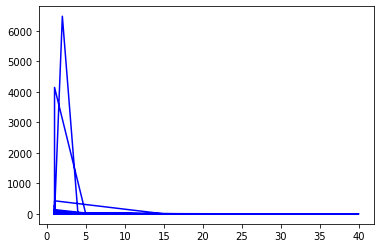

In [193]:
plt.plot(x,y,color='b')

In [47]:
gr = mean_stars[['작품개수','hit rate']]

In [48]:
a = gr.groupby(['작품개수']).mean()

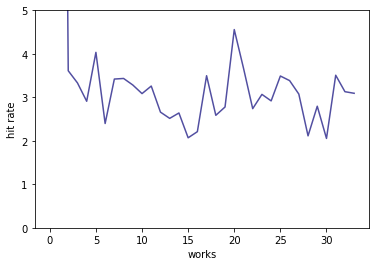

In [49]:
fig, ax = plt.subplots()
x = np.arange(34)
y = a['hit rate']
ax.plot(
    x,y,
    linestyle='-',
    color='#524FA1'
)
ax.set_ylim(0,5)
ax.set_xlabel("works")
ax.set_ylabel("hit rate")
plt.savefig('./works_hit_zoom.png')


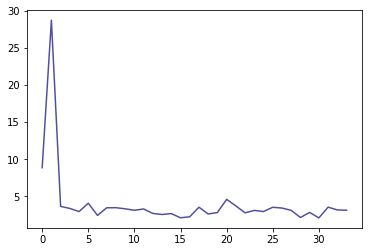

In [214]:
fig1, ax1 = plt.subplots()
x = np.arange(34)
y = a['hit rate']
ax1.plot(
    x,y,
    linestyle='-',
    color='#524FA1'
)
plt.savefig('./.png')


In [215]:
sc = pd.read_csv('./score.csv')

In [216]:
sc.head()

,0,1
0,9.3,1.15
1,9.0,5.44
2,8.9,17.86
3,8.8,7.21
4,8.7,12.32


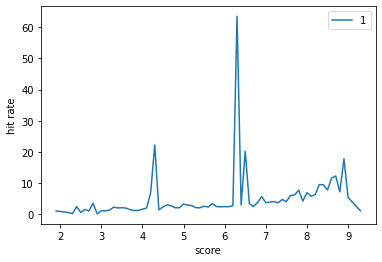

In [226]:
sc.plot(x='0',y='1',xlabel="score",ylabel="hit rate")
plt.savefig('./score_hit.png')

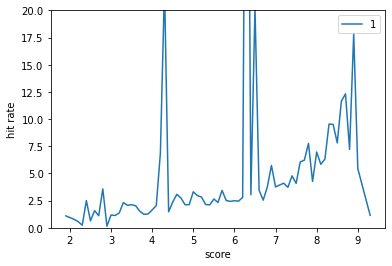

In [228]:
sc.plot(x='0',y='1',ylim=(0,20), xlabel="score",ylabel="hit rate")
plt.savefig('./score_hit_zoom.png')

In [229]:
gen = pd.read_csv('./genre.csv')

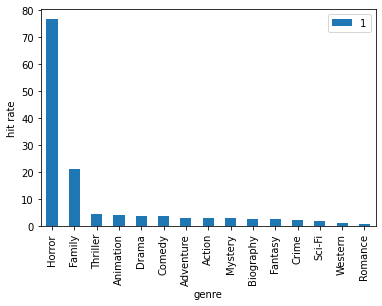

In [231]:
gen.plot(x='0',y='1',xlabel='genre',ylabel='hit rate',kind='bar')
plt.savefig('./genre_hit.png')

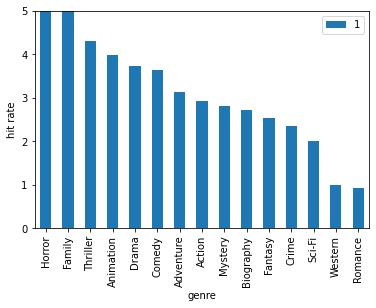

In [232]:
gen.plot(x='0',y='1',ylim=(0,5),xlabel='genre',ylabel='hit rate',kind='bar')
plt.savefig('./genre_hit_zoom.png')

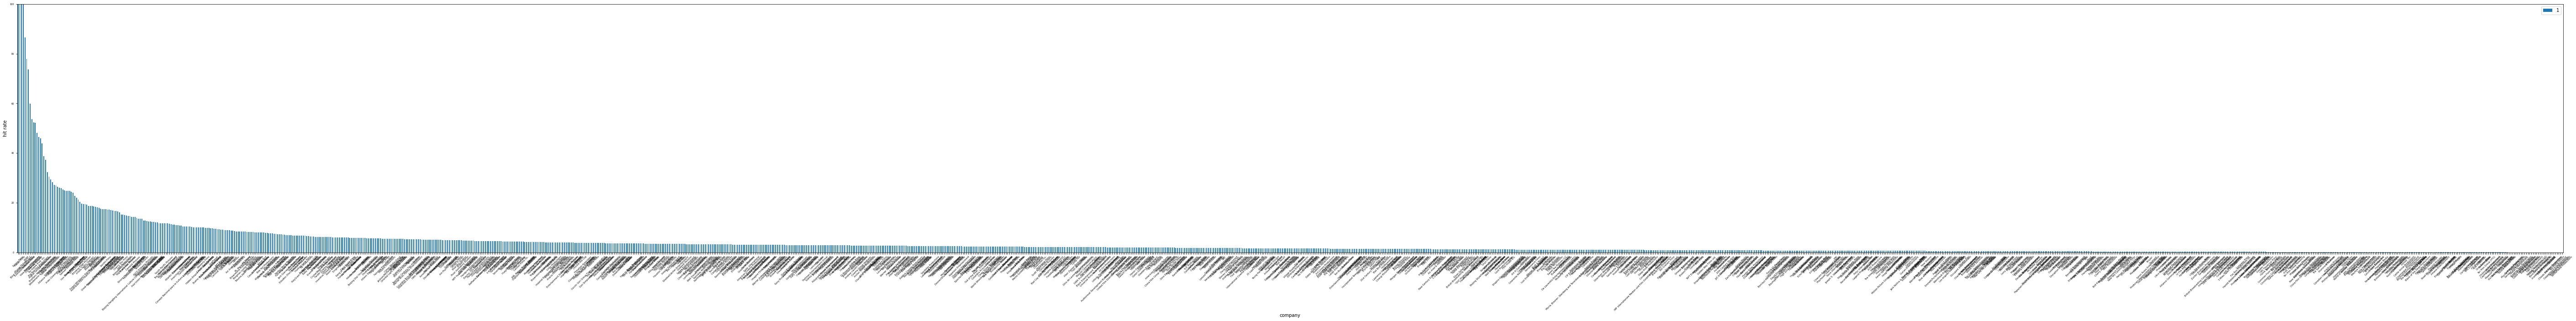

In [239]:
company = pd.read_csv('./company.csv')
company.plot(x='0',y='1',xlabel='company',ylim=(0,100),ylabel='hit rate',kind='bar',fontsize=5,figsize=(100,10),rot=45)
plt.savefig('./company_hit.png')

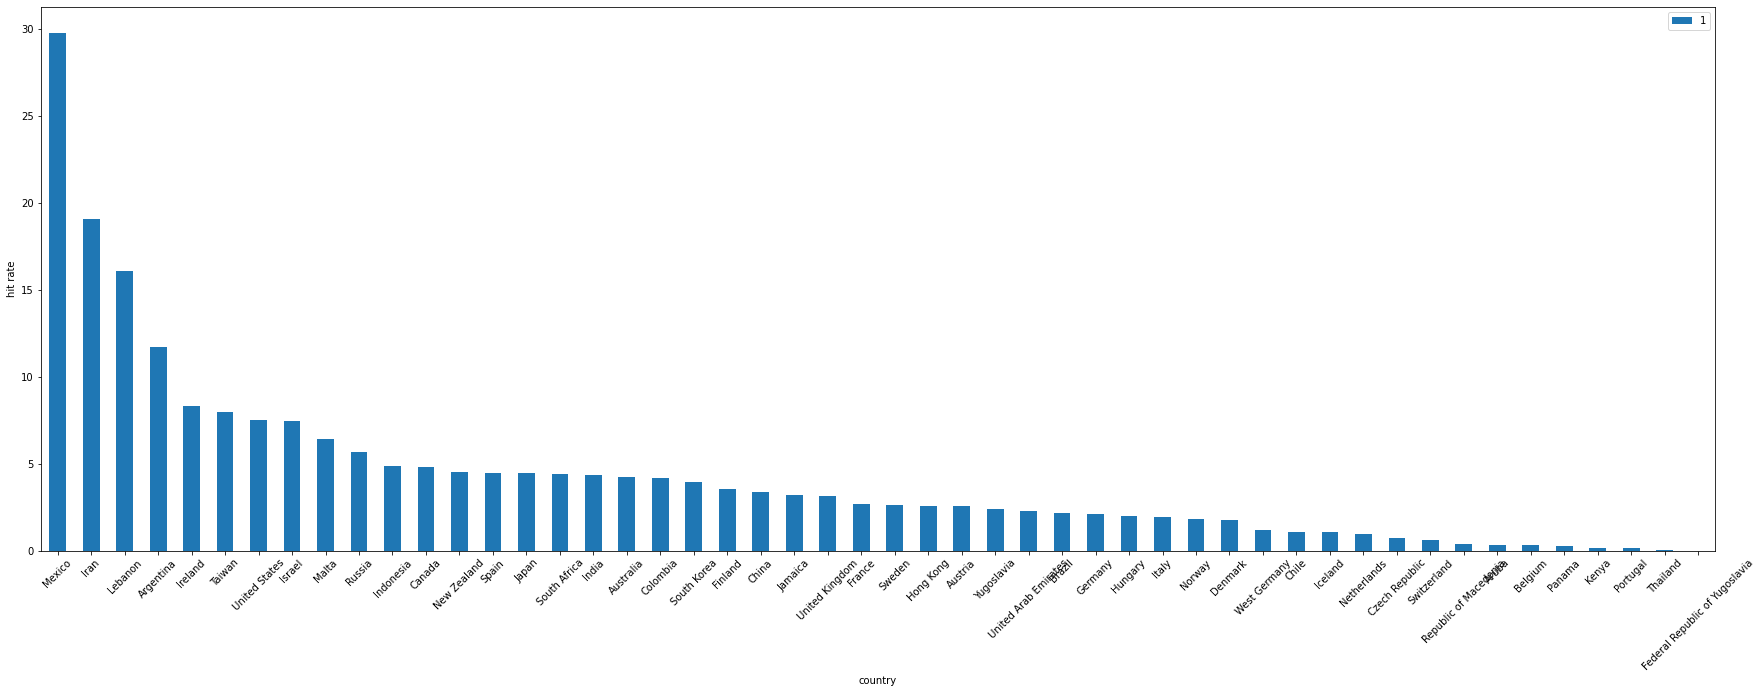

In [255]:
country = pd.read_csv('./country.csv')
country.plot(x='0',y='1',xlabel='country',ylabel='hit rate',kind='bar',figsize=(30,10),rot=45)
plt.savefig('./country_hit.png')

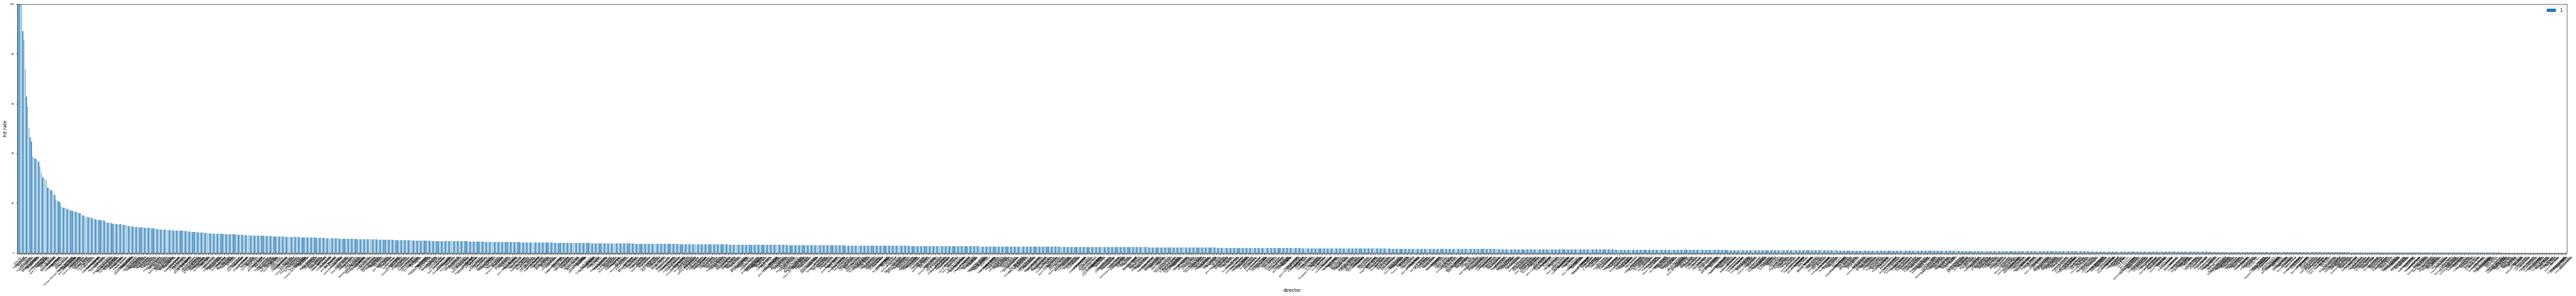

In [243]:
director = pd.read_csv('./director.csv')
director.plot(x='0',y='1',ylim=(0,100),xlabel='director',ylabel='hit rate',kind='bar',fontsize=5,figsize=(100,10),rot=45)
plt.savefig('./director_hit.png')

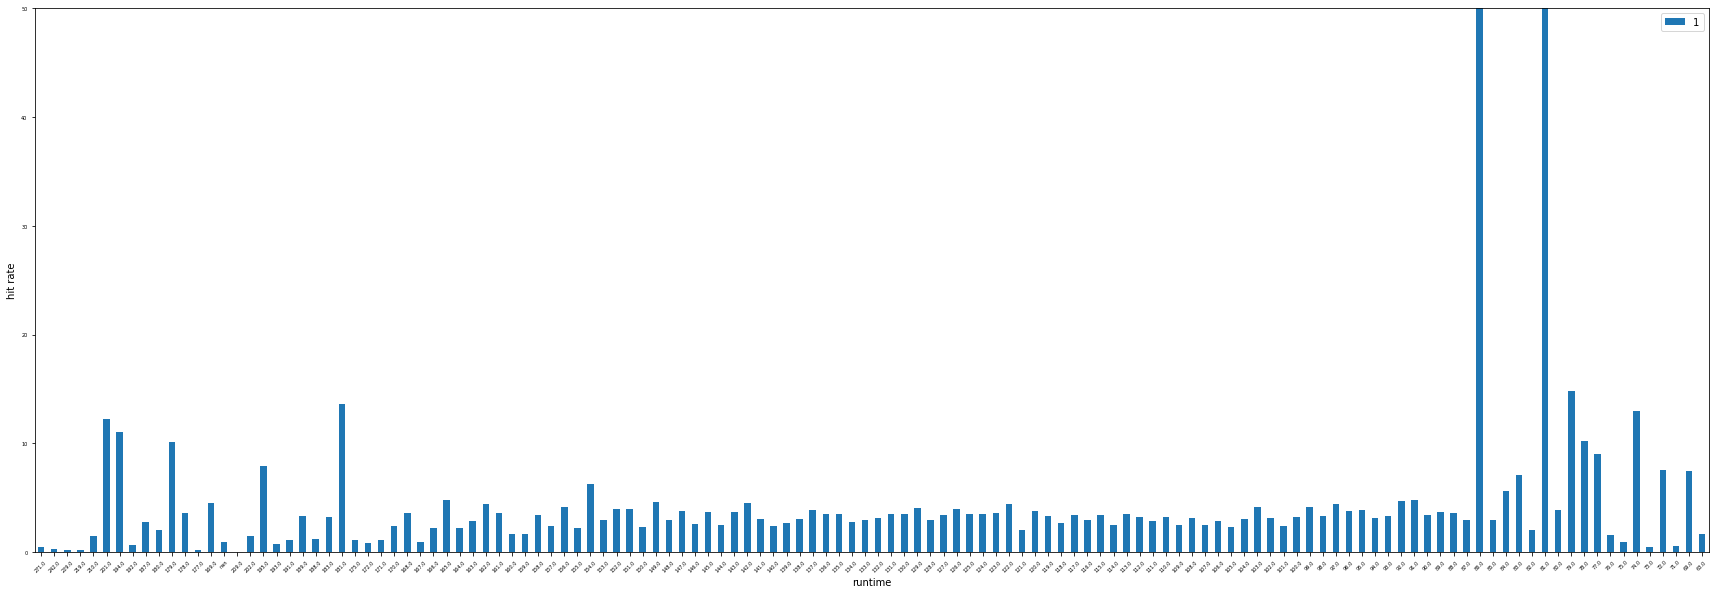

In [251]:
runtime = pd.read_csv('./runtime.csv')
runtime.plot(x='0',y='1',xlim=(60,275), ylim=(0,50), xlabel='runtime',ylabel='hit rate',kind='bar',fontsize=5,figsize=(30,10),rot=45)
plt.savefig('./runtime_hit.png')

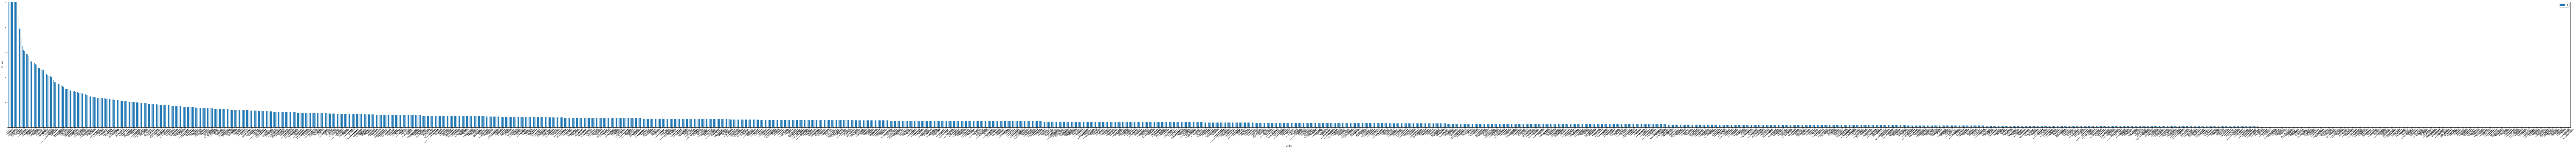

In [252]:
writer = pd.read_csv('./writer.csv')
writer.plot(x='0',y='1', ylim=(0,50), xlabel='writer',ylabel='hit rate',kind='bar',fontsize=5,figsize=(200,10),rot=45)
plt.savefig('./writer_hit.png')

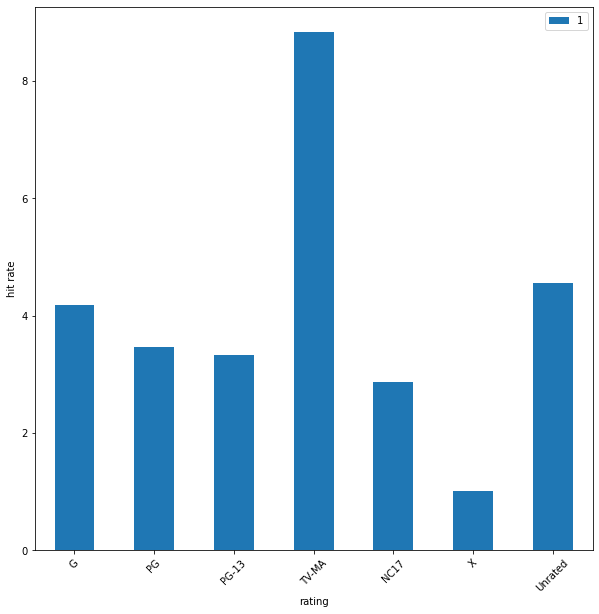

In [254]:
rating = pd.read_csv('./rating.csv')
rating.plot(x='0',y='1', xlabel='rating',ylabel='hit rate',kind='bar',figsize=(10,10),rot=45)
plt.savefig('./rating_hit.png')

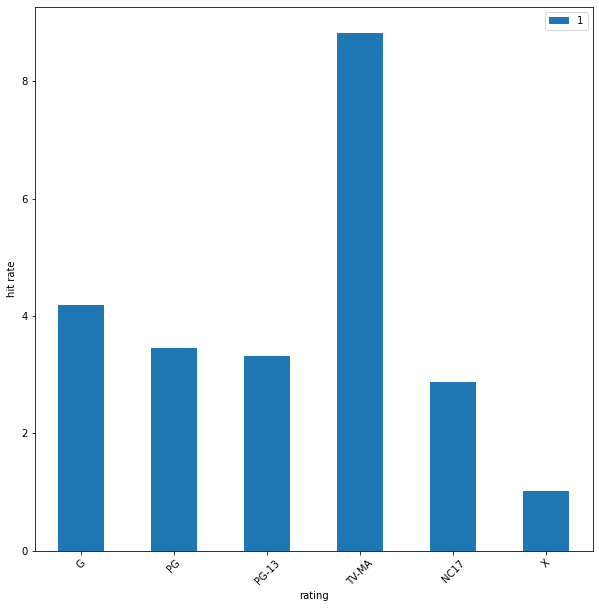

In [256]:
rating = pd.read_csv('./rating.csv')
rating.plot(x='0',y='1', xlabel='rating',ylabel='hit rate',kind='bar',figsize=(10,10),rot=45)
plt.savefig('./rating_hit.png')